# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
df.head()
df.shape

(1893, 8)

In [103]:
# Checking the number of mice.
df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [104]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = df.set_index('Mouse ID')
index_df.loc['g989']

Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21          26         35   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               45.000000                 0  
g989               48.786801                 0  
g989               47.570392                 0  
g989               51.745156                 0  
g989               49.880528                 0  
g989               51.325852                 1  
g989               53.442020                 0  
g989               55.326122                 1  
g989               54.657650                 1  
g989               56.045564                 1  
g989               59.082294                 1  
g989               62.570880                 2

In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df2 = clean_df.reset_index()

In [106]:
# Checking the number of mice in the clean DataFrame.
clean_df2['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df2.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_all = pd.DataFrame({ "Mean": tumor_mean,
                         "Median": tumor_med,
                         "Variance": tumor_var,
                         "Standard Deviation": tumor_std,
                         "SEM": tumor_sem})
tumor_all

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [108]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = clean_df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_agg

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

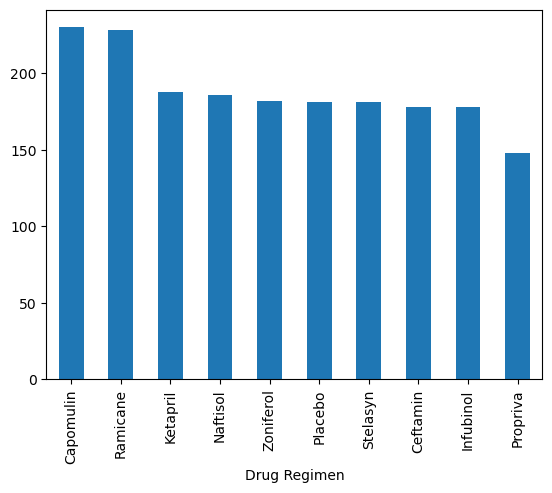

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
TP = clean_df2.groupby(['Drug Regimen'])['Timepoint'].count()
TP.sort_values(ascending=False).plot.bar()
plt.show()

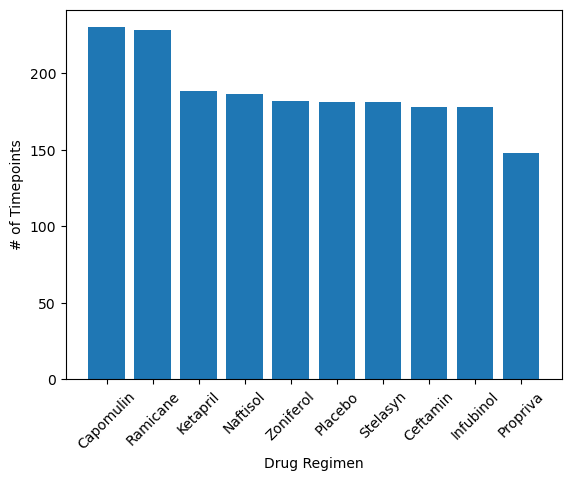

In [110]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
TP_desc = TP.sort_values(ascending=False)
plt.bar(TP_desc.index, TP_desc.values)
plt.ylabel('# of Timepoints', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

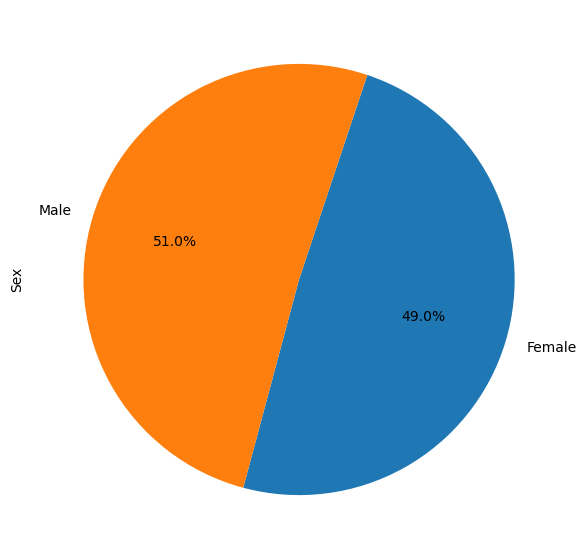

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
FvsM = clean_df2.groupby(['Sex'])['Sex'].count()
FvsM.plot.pie(startangle=255,autopct='%1.1f%%', figsize=(7,7))

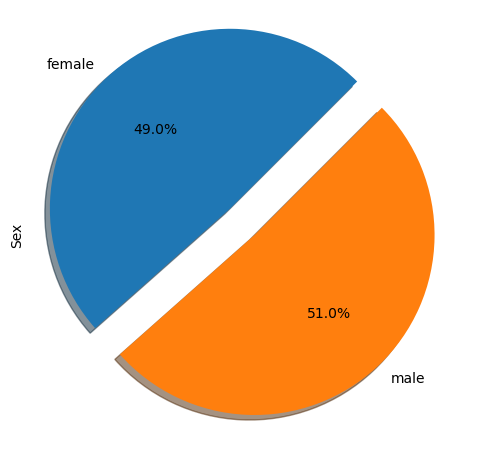

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.ylabel('Sex')
y = np.array([49,51])
myexplode = [0.2, 0]
plt.pie(FvsM, labels=('female', 'male'), startangle=45, autopct='%1.1f%%', explode = myexplode, shadow = True)
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timept = clean_df2.groupby(['Mouse ID'])['Timepoint'].max()
timept_df = pd.DataFrame(timept)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df2, timept_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       a203    Infubinol  Female          20          23         45   
1       a251    Infubinol  Female          21          25         45   
2       a262      Placebo  Female          17          29         45   
3       a275     Ceftamin  Female          20          28         45   
4       a366     Stelasyn  Female          16          29         30   
..       ...          ...     ...         ...         ...        ...   
243     z435     Propriva  Female          12          26         10   
244     z578     Ramicane    Male          11          16         45   
245     z581    Infubinol  Female          24          25         45   
246     z795     Naftisol  Female          13          29         45   
247     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [114]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treat_list[1]:
        ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treat_list[2]:
        inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treat_list[3]:
        ceft.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drugs_df = pd.DataFrame({"Capomulin": cap,
                       treat_list[1]: ram, 
                         treat_list[2]: inf, 
                         treat_list[3]: ceft})

drugs_df_max = drugs_df.max()
drugs_df_min = drugs_df.min()

drugs_df
    

Capomulin   Ramicane  Infubinol   Ceftamin
0   38.982878  38.407618  67.973419  62.999356
1   38.939633  43.047543  65.525743  45.000000
2   30.485985  38.810366  57.031862  56.057749
3   37.074024  32.978522  66.083066  55.742829
4   40.159220  38.342008  72.226731  48.722078
5   47.685963  33.397653  36.321346  47.784682
6   37.311846  37.311236  60.969711  61.849023
7   38.125164  40.659006  62.435404  68.923185
8   38.753265  29.128472  60.918767  67.748662
9   41.483008  33.562402  67.289621  57.918381
10  38.846876  36.374510  66.196912  46.784535
11  28.430964  31.560470  62.117279  59.851956
12  33.329098  36.134852  47.010364  64.299830
13  46.539206  22.050126  60.165180  59.741901
14  32.377357  30.564625  55.629428  61.433892
15  41.581521  31.095335  45.699331  64.192341
16  23.343598  45.220869  54.656549  45.000000
17  40.728578  36.561652  55.650681  52.925348
18  34.455298  37.225650  46.250112  45.000000
19  31.023923  43.419381  54.048608  67.527482
20  40.658124  30.276232  51.542431  45.000000
21  39.952347  40.667713  50.005138  64.634949
22  36.041047  43.166373  58.268442  61.386660
23  28.484033  44.183451  67.685569  68.594745
24  31.896238  30.638696  62.754451  64.729837

In [115]:
    # Determine outliers using upper and lower bounds
cap_quart = drugs_df[treat_list[0]].quantile([.25, .5, .75])
cap_low = cap_quart[.25]
cap_med = cap_quart[.5]
cap_upp = cap_quart[.75]
cap_iqr = cap_upp - cap_low
cap_low_bd = cap_low - (1.5*cap_iqr)
cap_up_bd = cap_upp - (1.5*cap_iqr)
cap_max = drugs_df[treat_list[0]].max()
cap_min = drugs_df[treat_list[0]].min()

ram_quart = drugs_df[treat_list[1]].quantile([.25, .5, .75])
ram_low = ram_quart[.25]
ram_med = ram_quart[.5]
ram_upp = ram_quart[.75]
ram_iqr = ram_upp - ram_low
ram_low_bd = ram_low - (1.5*ram_iqr)
ram_up_bd = ram_upp - (1.5*ram_iqr)
ram_max = drugs_df[treat_list[1]].max()
ram_min = drugs_df[treat_list[1]].min()

inf_quart = drugs_df[treat_list[2]].quantile([.25, .5, .75])
inf_low = inf_quart[.25]
inf_med = inf_quart[.5]
inf_upp = inf_quart[.75]
inf_iqr = inf_upp - inf_low
inf_low_bd = inf_low - (1.5*inf_iqr)
inf_up_bd = inf_upp - (1.5*inf_iqr)
inf_max = drugs_df[treat_list[2]].max()
inf_min = drugs_df[treat_list[2]].min()

ceft_quart = drugs_df[treat_list[3]].quantile([.25, .5, .75])
ceft_low = ceft_quart[.25]
ceft_med = ceft_quart[.5]
ceft_upp = ceft_quart[.75]
ceft_iqr = ceft_upp - inf_low
ceft_low_bd = ceft_low - (1.5*ceft_iqr)
ceft_up_bd = ceft_upp - (1.5*ceft_iqr)
ceft_max = drugs_df[treat_list[3]].max()
ceft_min = drugs_df[treat_list[3]].min()

outlrs = pd.DataFrame({'Drug': treat_list,
                      'Lower Quartile': [cap_low, ram_low, inf_low, ceft_low],
                       'Upper Quartile': [cap_upp, ram_upp, inf_upp, ceft_upp],
                       'Interquartile': [cap_iqr, ram_iqr, inf_iqr, ceft_iqr],
                       'Lower Bound': [cap_low_bd, ram_low_bd, inf_low_bd, ceft_low_bd],
                       'Upper Bound': [cap_up_bd, ram_up_bd, inf_up_bd, ceft_up_bd],
                       'Max': [cap_max, ram_max, inf_max, ceft_max],
                       'Min': [cap_min, ram_min, inf_min, ceft_min],
                       
                      })
outlrs
outlrs_group = outlrs.groupby('Drug')
outlrs_group.sum()

Lower Quartile  Upper Quartile  Interquartile  Lower Bound  \
Drug                                                                    
Capomulin       32.377357       40.159220       7.781863    20.704562   
Ceftamin        48.722078       64.299830      10.251222    33.345244   
Infubinol       54.048608       65.525743      11.477135    36.832905   
Ramicane        31.560470       40.659006       9.098537    17.912664   

           Upper Bound        Max        Min  
Drug                                          
Capomulin    28.486425  47.685963  23.343598  
Ceftamin     48.922997  68.923185  45.000000  
Infubinol    48.310040  72.226731  36.321346  
Ramicane     27.011201  45.220869  22.050126

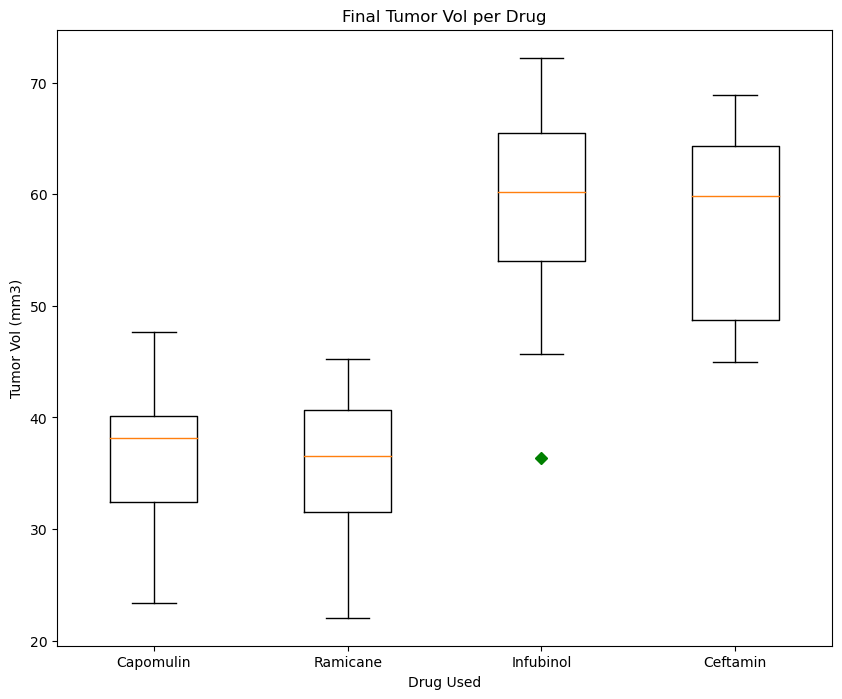

In [116]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
bp_info = [drugs_df[treat_list[0]],
      drugs_df[treat_list[1]],
      drugs_df[treat_list[2]],
      drugs_df[treat_list[3]]
     ]
BxPlt, axes = plt.subplots(figsize=(10,8))
axes.set_title('Final Tumor Vol per Drug')
axes.set_xlabel('Drug Used')
axes.set_ylabel('Tumor Vol (mm3)')

axes.boxplot(bp_info, 0, 'gD')
plt.xticks([1,2,3,4], treat_list)
plt.savefig('boxplot tumor')
plt.show()

## Line and Scatter Plots

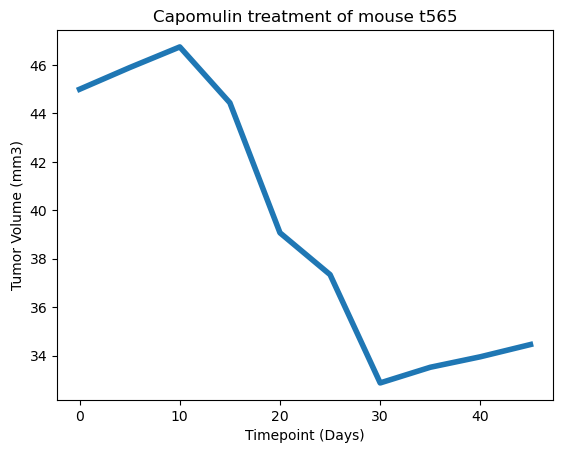

In [117]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lineplt_df = clean_df2.loc[clean_df2["Mouse ID"] == "t565",:]
lineplt_df

TP = lineplt_df["Timepoint"]
tsize = lineplt_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse t565')
plt.plot(TP, tsize, linewidth=4 ,markersize=14)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('t565 linechart')
plt.show()

C:\Users\12105\AppData\Local\Temp\ipykernel_19028\394367978.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap = capreg_df.groupby(["Mouse ID"]).mean()


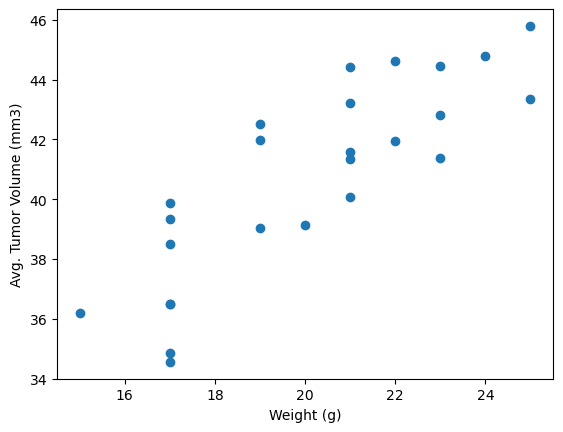

In [122]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capreg_df = clean_df2.loc[clean_df2["Drug Regimen"] == "Capomulin",:]
avg_cap = capreg_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')

plt.savefig('mouse scatterplot')
plt.show()

## Correlation and Regression

In [124]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
CorCalc=round(st.pearsonr(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {CorCalc}")

The correlation between mouse weight and the average tumor volume is 0.84


In [125]:
line=st.linregress(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])
line

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [126]:
slope = 0.9544396890241049
intercept = 21.552160532685008

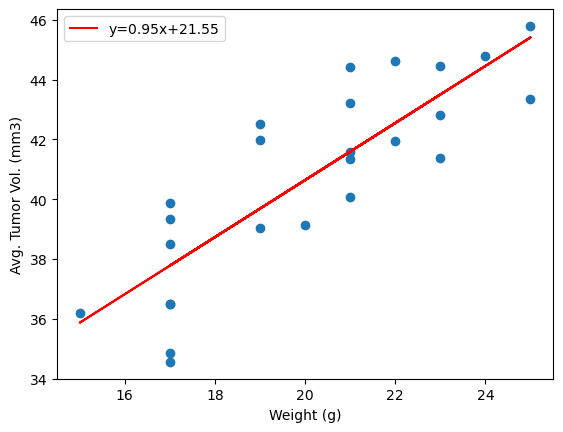

In [129]:
liner = slope*(avg_cap['Weight (g)'])+intercept

plt.scatter(avg_cap['Weight (g)'],avg_cap['Tumor Volume (mm3)'])

plt.plot(avg_cap['Weight (g)'], liner, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Vol. (mm3)')

plt.legend()
plt.savefig('linearregression')
plt.show()